In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sequence_tools as st
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression

import parse_dms_tools as dms
import parse_msa_tools as msa
#import parse_dssp as dssp
import seaborn as sns; sns.set()
sns.set_style('white')

import pickle

my_path = '/Users/hridindu/Documents/C3-C7_paper/PU/C3'

In [3]:
#reference sequences with subsequent coding start, coding terminus, n-terminus offset. 
c3 = 'caspase3_ref.fasta'
(c3o, c3t, c3_off) = (149,926,28)

c7 = 'caspase7_ref.fasta'
(c7o, c7t, c7_off) = (148, 994, 23)

important_positions = [164, 122, 176]

In [4]:
caspase_re = pickle.load(open('caspase_re.pkl', 'rb'))

In [5]:

C3_1 = pd.read_csv('C3-1_parameters.csv')
C3_1['Position_c3'] = C3_1['group'] + c3_off
C3_1['WT_aa'] = C3_1['Unnamed: 0'].str.slice(start = 0, stop = 1)
C3_1['mut'] = C3_1['Unnamed: 0'].apply(lambda x: x[-1])
C3_1 = C3_1.drop(columns = ["Unnamed: 0"])

C3_1 = C3_1.merge(
                                caspase_re[['Position_c3','Aligned Position', 'mean_RE_c3']], 
                                left_on = 'Position_c3',
                                right_on = 'Position_c3'
                                )
C3_1 = C3_1.drop(labels = ['sep','group'], axis = 1)

FileNotFoundError: [Errno 2] No such file or directory: 'C3-1_parameters.csv'

In [5]:

C3_2 = pd.read_csv('C3-2_parameters.csv')
C3_2['Position_c3'] = C3_2['group'] + c3_off
C3_2['WT_aa'] = C3_2['Unnamed: 0'].str.slice(start = 0, stop = 1)
C3_2['mut'] = C3_2['Unnamed: 0'].apply(lambda x: x[-1])
C3_2 = C3_2.drop(columns = ["Unnamed: 0"])

C3_2 = C3_2.merge(
                                caspase_re[['Position_c3','Aligned Position', 'mean_RE_c3']], 
                                left_on = 'Position_c3',
                                right_on = 'Position_c3'
                                )
C3_2 = C3_2.drop(labels = ['sep','group'], axis = 1)

In [6]:

C3_3 = pd.read_csv('C3-3_parameters.csv')
C3_3['Position_c3'] = C3_3['group'] + c3_off
C3_3['WT_aa'] = C3_3['Unnamed: 0'].str.slice(start = 0, stop = 1)
C3_3['mut'] = C3_3['Unnamed: 0'].apply(lambda x: x[-1])
C3_3 = C3_3.drop(columns = ["Unnamed: 0"])

C3_3 = C3_3.merge(
                                caspase_re[['Position_c3','Aligned Position', 'mean_RE_c3']], 
                                left_on = 'Position_c3',
                                right_on = 'Position_c3'
                                )
C3_3 = C3_3.drop(labels = ['sep','group'], axis = 1)

/Applications/Anaconda3/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


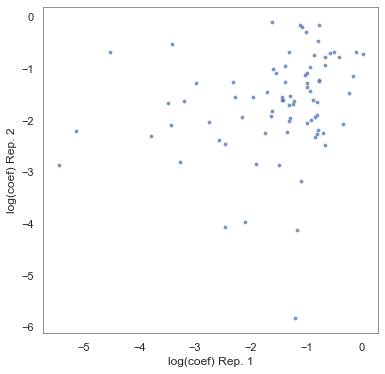

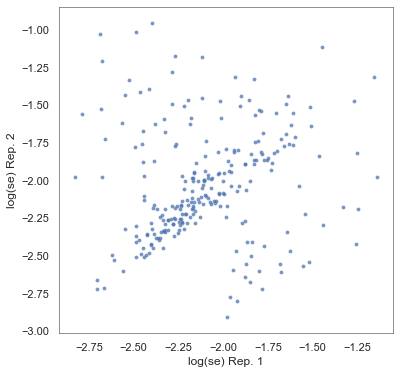

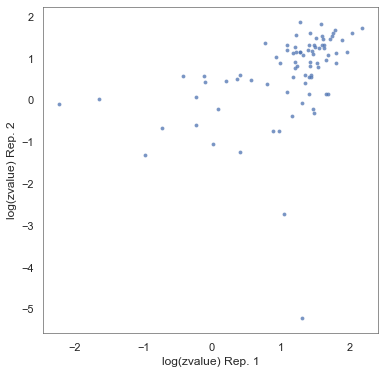

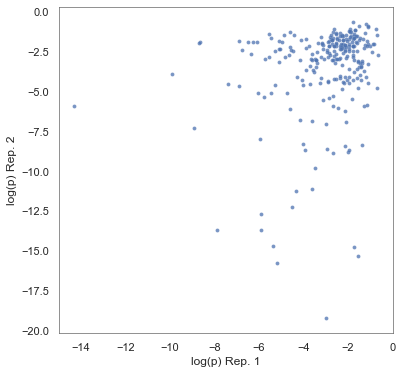

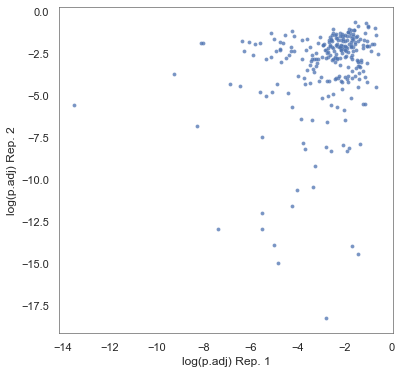

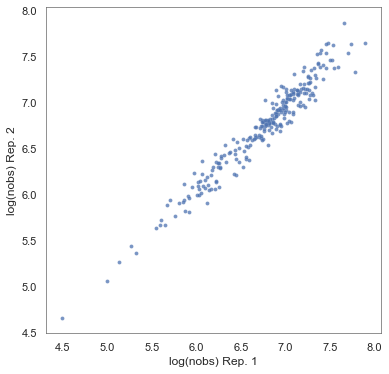

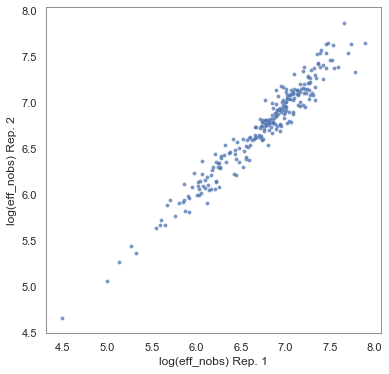

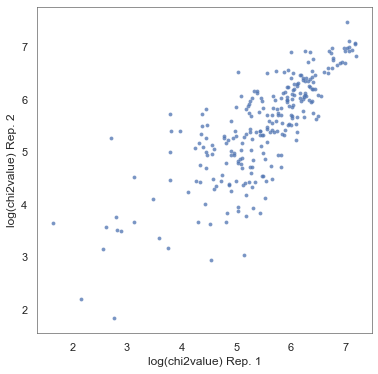

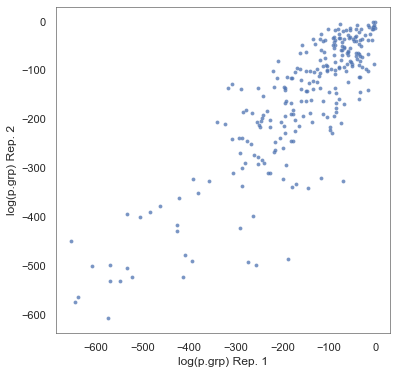

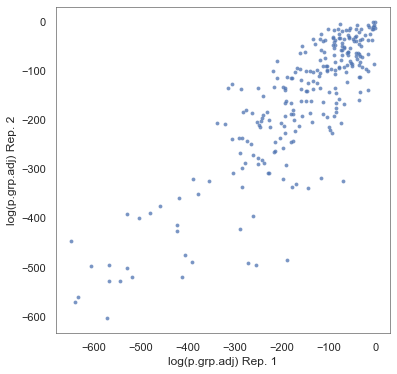

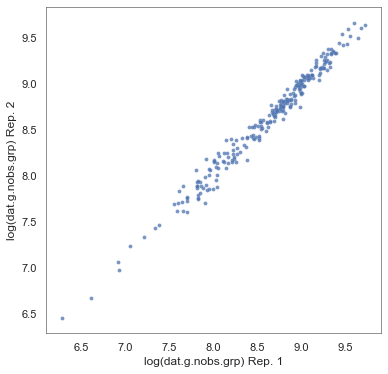

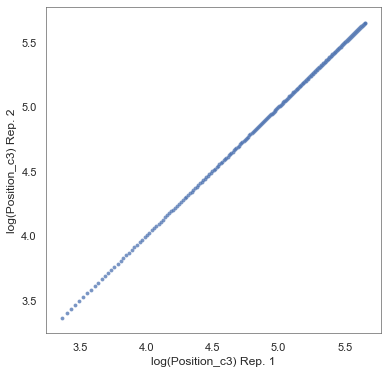

KeyError: 'WT_aa'

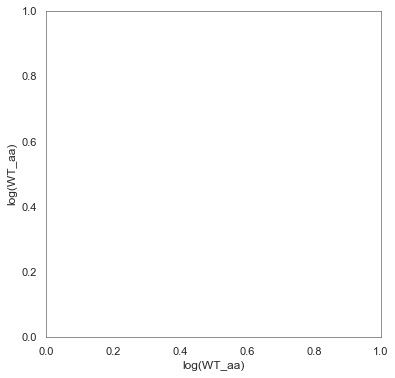

In [7]:
for i, metric1 in enumerate(list(C3_1)[:-1]):
    for j, metric2 in enumerate(list(C3_2)[:-1]):
        if (metric1 == metric2) and (metric1 or metric2) != 'Aligned Position':
            fig5 = plt.figure(figsize=(6,6))
            ax = plt.gca()
            # ax.set_aspect('equal', 'box')
            # ax.plot([0,.008*100],[0,.008*100],c = 'grey', alpha = 1, linewidth = .25)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            plt.xlabel('log(%s)' % metric1)
            plt.ylabel('log(%s)' % metric2)

            sns.scatterplot(x = np.log(C3_1.groupby('Aligned Position').mean()['%s' % metric1]),
                            y = np.log(C3_2.groupby('Aligned Position').mean()['%s' % metric2]),
                            markers = 'o',
                            linewidth = .1,
#                             facecolor = ['none' if c == 'b' else 'black' for c in c_mean['shared_res_color']], 
                            alpha=.75, 
                            edgecolors='black',
                            s = 15
                           )
            plt.xlabel('log(%s) Rep. 1' % metric1)
            plt.ylabel('log(%s) Rep. 2' % metric2)
            
            plt.show()
            plt.close()

In [ ]:
for i, metric1 in enumerate(list(C3_1)[:-1]):
    for j, metric2 in enumerate(list(C3_3)[:-1]):
        if (metric1 == metric2) and (metric1 or metric2) != 'Aligned Position':
            fig5 = plt.figure(figsize=(6,6))
            ax = plt.gca()
            # ax.set_aspect('equal', 'box')
            # ax.plot([0,.008*100],[0,.008*100],c = 'grey', alpha = 1, linewidth = .25)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            plt.xlabel('log(%s)' % metric1)
            plt.ylabel('log(%s)' % metric2)

            sns.scatterplot(x = np.log(C3_1.groupby('Aligned Position').mean()['%s' % metric1]),
                            y = np.log(C3_3.groupby('Aligned Position').mean()['%s' % metric2]),
                            markers = 'o',
                            linewidth = .1,
#                             facecolor = ['none' if c == 'b' else 'black' for c in c_mean['shared_res_color']], 
                            alpha=.75, 
                            edgecolors='black',
                            s = 15
                           )
            plt.xlabel('log(%s) Rep. 1' % metric1)
            plt.ylabel('log(%s) Rep. 3' % metric2)
            
            plt.show()
            plt.close()

In [ ]:
for i, metric1 in enumerate(list(C3_2)[:-1]):
    for j, metric2 in enumerate(list(C3_3)[:-1]):
        if (metric1 == metric2) and (metric1 or metric2) != 'Aligned Position':
            fig5 = plt.figure(figsize=(6,6))
            ax = plt.gca()
            # ax.set_aspect('equal', 'box')
            # ax.plot([0,.008*100],[0,.008*100],c = 'grey', alpha = 1, linewidth = .25)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            plt.xlabel('log(%s)' % metric1)
            plt.ylabel('log(%s)' % metric2)

            sns.scatterplot(x = np.log(C3_2.groupby('Aligned Position').mean()['%s' % metric1]),
                            y = np.log(C3_3.groupby('Aligned Position').mean()['%s' % metric2]),
                            markers = 'o',
                            linewidth = .1,
#                             facecolor = ['none' if c == 'b' else 'black' for c in c_mean['shared_res_color']], 
                            alpha=.75, 
                            edgecolors='black',
                            s = 15
                           )
            plt.xlabel('log(%s) Rep. 2' % metric1)
            plt.ylabel('log(%s) Rep. 3' % metric2)
            
            plt.show()
            plt.close()

In [ ]:
C3_1


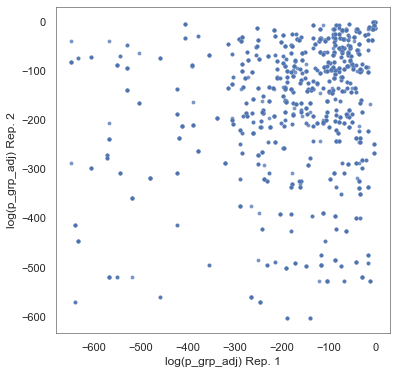

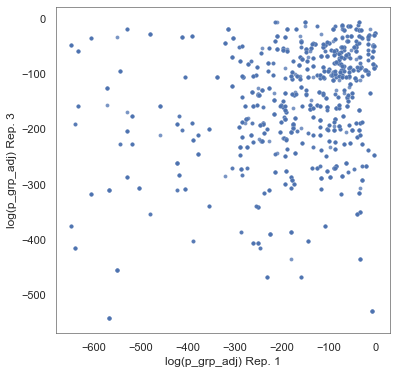

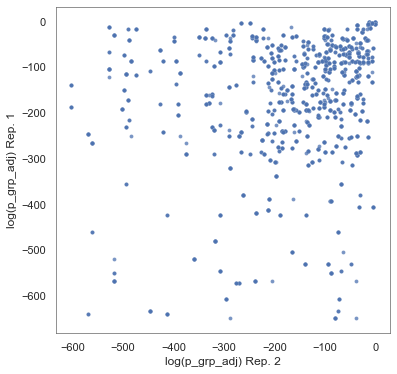

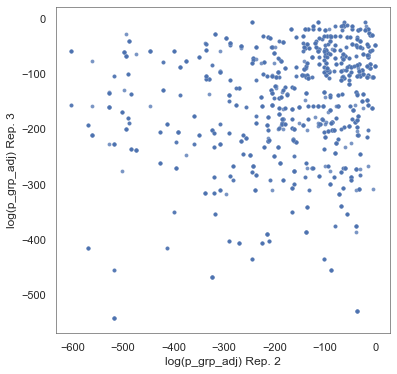

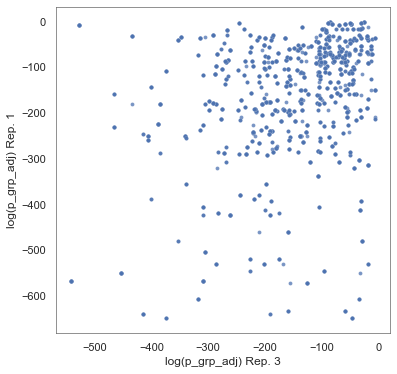

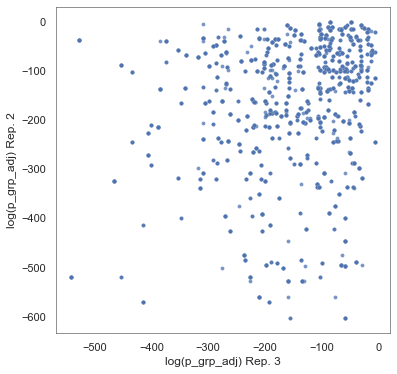

In [9]:
reps = [C3_1, C3_2, C3_3]
for i,repx in enumerate(reps,1):
    for j, repy in enumerate(reps,1): 
        if i != j:
            fig5 = plt.figure(figsize=(6,6))
            ax = plt.gca()
            # ax.set_aspect('equal', 'box')
            # ax.plot([0,.008*100],[0,.008*100],c = 'grey', alpha = 1, linewidth = .25)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            plt.xlabel('log(%s)' % 'p_group_adj')
            plt.ylabel('log(%s)' % 'p_group_adj')
            
            sns.scatterplot(x = np.log(repx['p.grp.adj']),
                            y = np.log(repy['p.grp.adj']),
                            markers = 'o',
                            linewidth = .1,
#                             facecolor = ['none' if c == 'b' else 'black' for c in c_mean['shared_res_color']], 
                            alpha=.75, 
                            edgecolors='black',
                            s = 15
                           )
            plt.xlabel('log(p_grp_adj) Rep. %i' % i)
            plt.ylabel('log(p_grp_adj) Rep. %i' % j)
            
            plt.show()
            plt.close()


In [ ]:
for i,repx in enumerate(reps,1):
    for j, repy in enumerate(reps,1): 
        if i != j:
            fig5 = plt.figure(figsize=(6,6))
            ax = plt.gca()
            # ax.set_aspect('equal', 'box')
            # ax.plot([0,.008*100],[0,.008*100],c = 'grey', alpha = 1, linewidth = .25)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)

            
            sns.scatterplot(x = np.log(repx['p.adj']),
                            y = np.log(repy['p.adj']),
                            markers = 'o',
                            linewidth = .1,
#                             facecolor = ['none' if c == 'b' else 'black' for c in c_mean['shared_res_color']], 
                            alpha=.75, 
                            edgecolors='black',
                            s = 15
                           )
            plt.xlabel('log(p_adj) Rep. %i' % i)
            plt.ylabel('log(p_adj) Rep. %i' % j)
            
            plt.show()
            plt.close()


In [ ]:
for i,repx in enumerate(reps,1):
    for j, repy in enumerate(reps,1): 
        if i != j:
            fig5 = plt.figure(figsize=(6,6))
            ax = plt.gca()
            # ax.set_aspect('equal', 'box')
            # ax.plot([0,.008*100],[0,.008*100],c = 'grey', alpha = 1, linewidth = .25)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)

            
            sns.scatterplot(x = np.log(repx.groupby('Aligned Position').mean().abs()['coef']),
                            y = np.log(repy.groupby('Aligned Position').mean().abs()['coef']),
                            markers = 'o',
                            linewidth = .1,
#                             facecolor = ['none' if c == 'b' else 'black' for c in c_mean['shared_res_color']], 
                            alpha=.75, 
                            edgecolors='black',
                            s = 15
                           )
            plt.xlabel('log(mean(abs(coef))) Rep. %i' % i)
            plt.ylabel('log(mean(abs(coef))) Rep. %i' % j)
            
            plt.show()
            plt.close()

            

In [ ]:
for i,repx in enumerate(reps,1):
    for j, repy in enumerate(reps,1): 
        if i != j:
            fig5 = plt.figure(figsize=(6,6))
            ax = plt.gca()
            # ax.set_aspect('equal', 'box')
            # ax.plot([0,.008*100],[0,.008*100],c = 'grey', alpha = 1, linewidth = .25)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)

            
            sns.scatterplot(x = (repx['coef']),
                            y = (repy['coef']),
                            markers = 'o',
                            linewidth = .1,
#                             facecolor = ['none' if c == 'b' else 'black' for c in c_mean['shared_res_color']], 
                            alpha=.75, 
                            edgecolors='black',
                            s = 15
                           )
            plt.xlabel('coef Rep. %i' % i)
            plt.ylabel('coef Rep. %i' % j)
            
            plt.show()
            plt.close()


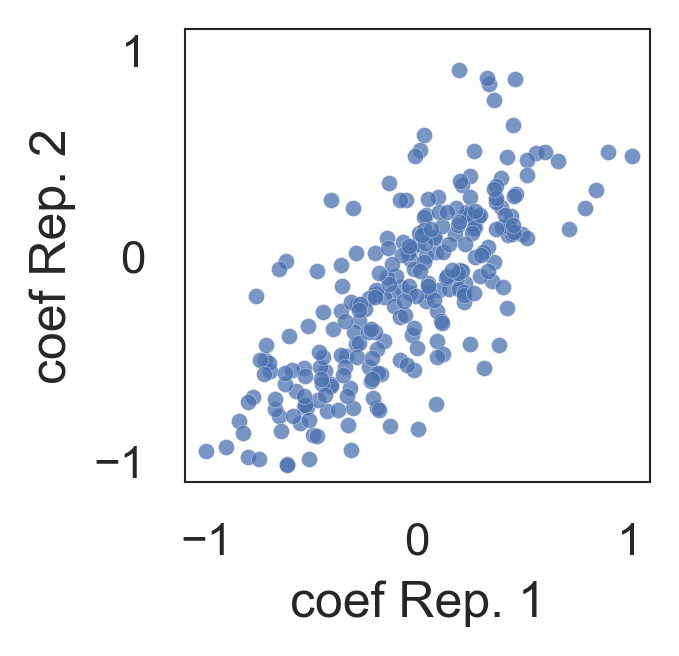

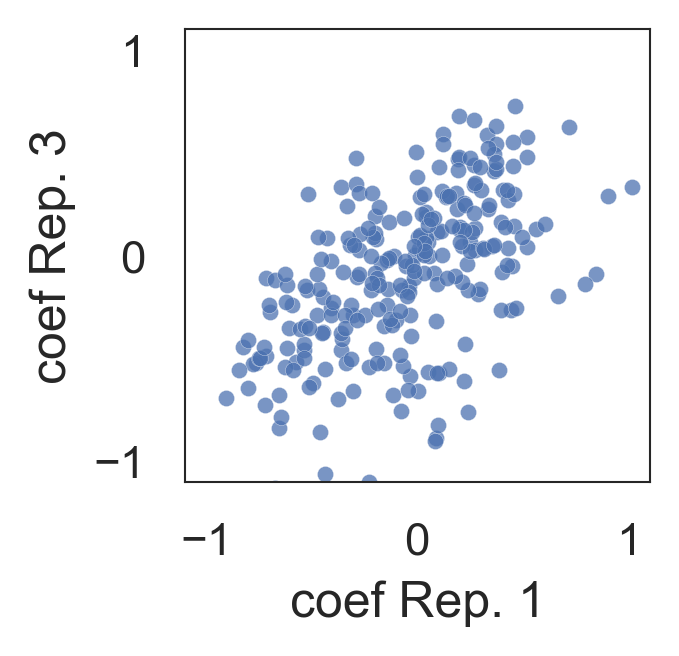

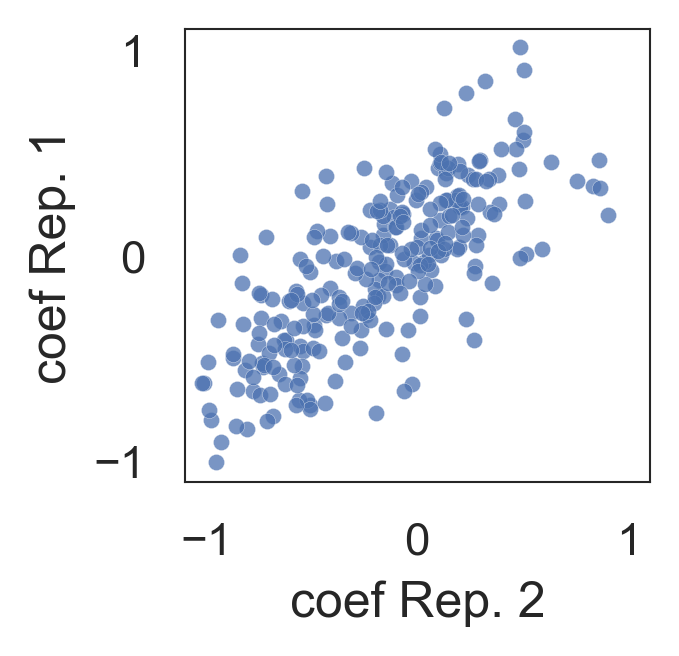

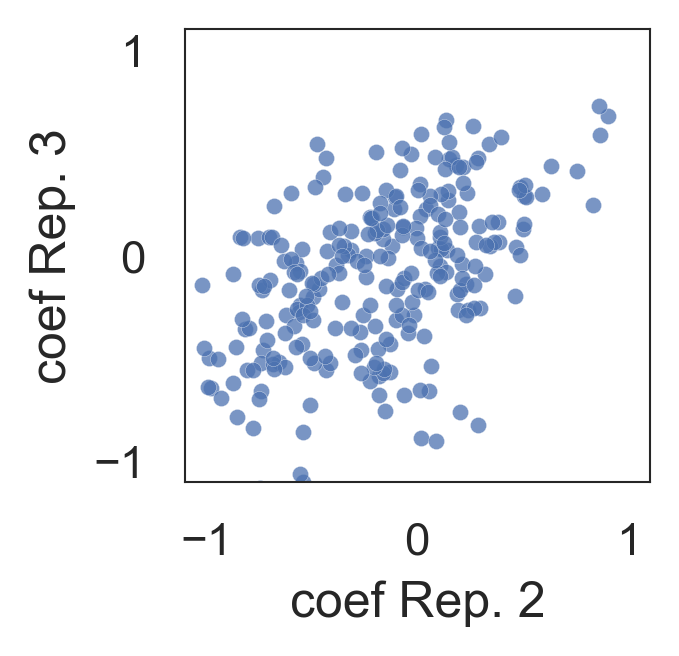

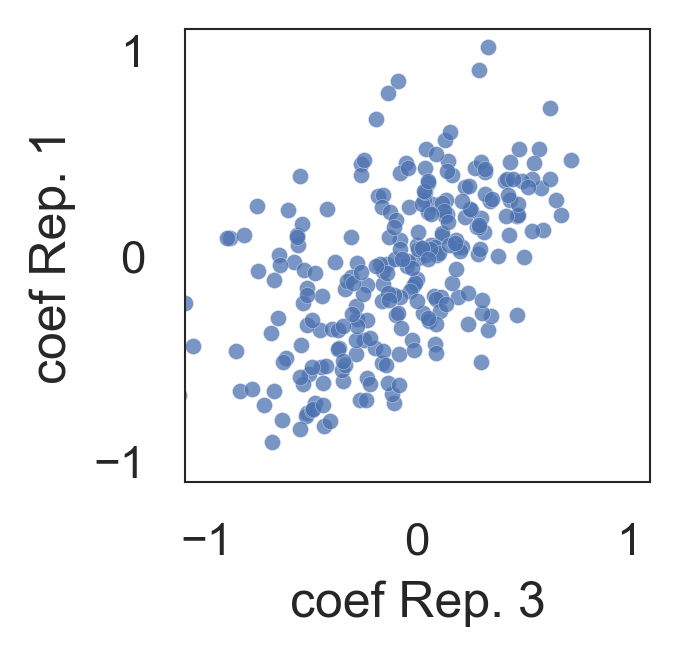

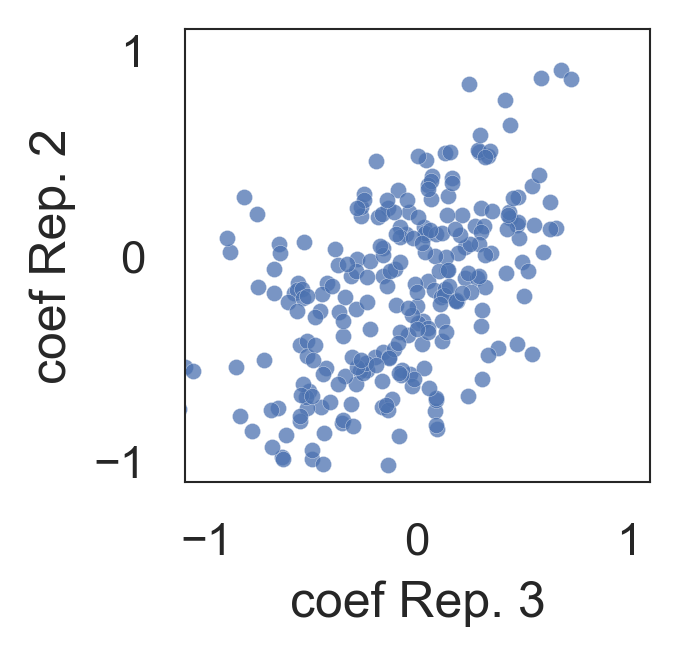

In [18]:
for i,repx in enumerate(reps,1):
    for j, repy in enumerate(reps,1): 
        if i != j:
            fig5 = plt.figure(figsize=(2,2), dpi = 300)
            ax = plt.gca()
            # ax.set_aspect('equal', 'box')
            # ax.plot([0,.008*100],[0,.008*100],c = 'grey', alpha = 1, linewidth = .25)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            ax.set_xlim(-1.1,1.1)
            ax.set_ylim(-1.1,1.1)
            
            sns.scatterplot(x = (repx.groupby('Aligned Position').mean()['coef']),
                            y = (repy.groupby('Aligned Position').mean()['coef']),
                            markers = 'o',
                            linewidth = .1,
#                             facecolor = ['none' if c == 'b' else 'black' for c in c_mean['shared_res_color']], 
                            alpha=.75, 
                            edgecolors='black',
                            s = 15
                           )
            plt.xlabel('coef Rep. %i' % i)
            plt.ylabel('coef Rep. %i' % j)
            plt.savefig('c3_coef_scatter_%i_%i.svg' % (i,j), 
                         transparent = True, 
                         dpi = 300)
            plt.show()

            plt.close()

In [ ]:
# pickle.dump(C3_1, open('C3_1.pkl', 'wb'))
# pickle.dump(C3_2, open('C3_2.pkl', 'wb'))
# pickle.dump(C3_3, open('C3_3.pkl', 'wb'))

In [2]:
import plotly